In [2]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr2tapn/')
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/vco/Projects/pm4py-dcr2tapn
/home/vco/Projects/pm4py-dcr2tapn


In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from copy import deepcopy
from pm4py.objects.dcr.obj import dcr_template
from pm4py.objects.dcr.importer import importer as dcr_importer
from pm4py.objects.dcr.exporter import exporter as dcr_exporter
from pm4py.objects.dcr.utils.utils import nested_groups_and_sps_to_flat_dcr

ImportError: cannot import name 'add_arc_from_to_with_check' from 'pm4py.objects.petri_net.utils.petri_utils' (/home/vco/Projects/pm4py-dcr2tapn/pm4py/objects/petri_net/utils/petri_utils.py)

# New conversion via arc pattern tables

In [13]:
from pm4py.objects.conversion.dcr_apt.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri
example = 'models/RunningExampleTAPNoriginal.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/original.tapn')
print()
print(table_to_latex_general(master_df,'Original',dcr_dict,dcr2tapn.delay_dict))

example = 'models/RunningExampleTAPNoriginal-livelock.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/original-livelock.tapn')
print()
print(table_to_latex_general(master_df,'Livelock',dcr_dict,dcr2tapn.delay_dict))

example = 'models/RunningExampleTAPNMilestone.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/milestone-deadlock.tapn')
print()
print(table_to_latex_general(master_df,'Deadlock',dcr_dict,dcr2tapn.delay_dict))


\begin{tabular}{cr|c|c|c|c|c}
$ Original $ & & \multicolumn{3}{c|}{MakePayment} & \multicolumn{1}{c|}{EditPaymentInfo} & \multicolumn{1}{c}{AddOrder} \\ 
& &  In & Re(10) & Rex(10) & Ex & In \\ \cline{2-7} 
\multirow{1}{*}{EditPaymentInfo} & $t_{0}$ &  &  &  & \readArc{} &  \\ \cline{2-7} 
 & $t_{1}$ &  &  &  & \inhiboa{} &  \\ \hline 
\multirow{5}{*}{AddOrder} & $t_{0}$ & \readArc{} & \inhiboa{} &  &  & \ia{} \\ \cline{2-7} 
 & $t_{1}$ & \readArc{} & \readArc{} &  &  & \ia{} \\ \cline{2-7} 
 & $t_{2}$ & \readArc{} & \oa{} &  &  & \ia{} \\ \cline{2-7} 
 & $t_{3}$ & \inhiboa{} & \inhiboa{} & \inhib{} &  & \ia{} \\ \cline{2-7} 
 & $t_{4}$ & \inhiboa{} & \oa{} & \ia{} &  & \ia{} \\ \cline{2-7} 
 & $t_{5}$ & \inhiboa{} & \oa{} &  &  & \ia{} \\ \hline 
\multirow{3}{*}{MakePayment} & $t_{0}$ & \ia{} & \inhib{} &  & \ttioa & \readArc{} \\ \cline{2-7} 
 & $t_{1}$ & \ia{} & \ia{} &  & \ttioa & \readArc{} \\ \cline{2-7} 
 & $t_{2}$ & \ia{} & \inhib{} &  & \ttioa & \inhiboa{} \\ \cline{2-7} 
 & 

# Old conversion direct to petri nets

In [ ]:
from pm4py.objects.conversion.dcr.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri
example = 'models/RunningExampleTAPNoriginal.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m = dcr2tapn.apply(dcr_dict,tapn_path='models/original-old.tapn')

example = 'models/RunningExampleTAPNoriginal-livelock.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m = dcr2tapn.apply(dcr_dict,tapn_path='models/original-livelock-old.tapn')

example = 'models/RunningExampleTAPNMilestone.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m = dcr2tapn.apply(dcr_dict,tapn_path='models/milestone-deadlock-old.tapn')

# Latex: Aprs for the appendix and maybe the main body

In [7]:
def table_to_latex(pd_table,all_i,pairwise_i):
    res = ''
    k = 0
    for i, (idx ,row) in enumerate(pd_table.iterrows()):
        pin = num_to_sym_tex[int(row['In'])]
        pex = num_to_sym_tex[int(row['Ex'])]
        pre = num_to_sym_tex[int(row['Re_10'])] if 'Re_10' in row else ''
        prex = num_to_sym_tex[int(row['Rex_10'])] if 'Re_10' in row else ''
        pre_others = num_to_sym_tex[int(row['Re_5'])] if 'Re_5' in row else ''
        prex_others = num_to_sym_tex[int(row['Rex_5'])] if 'Rex_5' in row else ''
        if i in all_i:
            pre1, pre2, pre3 = pre_others,pre_others,pre_others
            prex1, prex2, prex3 = prex_others,prex_others,prex_others
            latex_row = f"& $t_{i+k}$ & {pin} & {pex} & {pre}  & {pre1}  & {pre2}  & {pre3} & {prex} & {prex1}  & {prex2} & {prex3} "+"\\\\ \cline{2-12} \n"
            res += latex_row
        elif i in pairwise_i:
            for k in [0,1,2]:
                if k == 0:
                    pre1, pre2, pre3 = pre_others,'',''
                    prex1, prex2, prex3 = prex_others,'',''
                elif k == 1:
                    middle = ''
                    if pre_others!='':
                        middle = '\ddots'
                    pre1, pre2, pre3 = '',middle,''
                    middle = ''
                    if prex_others!='':
                        middle = '\ddots'
                    prex1, prex2, prex3 = '',middle,''
                else: # k == 2
                    pre1, pre2, pre3 = '','',pre_others
                    prex1, prex2, prex3 = '','',prex_others
                
                latex_row = f"& $t_{i+k}$ & {pin} & {pex} & {pre}  & {pre1}  & {pre2}  & {pre3} & {prex} & {prex1}  & {prex2} & {prex3} "+"\\\\ \cline{2-12} \n"
                res += latex_row
        else:
            pre1, pre2, pre3 = '','',''
            prex1, prex2, prex3 = '','',''
            latex_row = f"& $t_{i+k}$ & {pin} & {pex} & {pre}  & {pre1}  & {pre2}  & {pre3} & {prex} & {prex1}  & {prex2} & {prex3} "+"\\\\ \cline{2-12} \n"
            res += latex_row
    return res

rel_to_tex_sym = {
                'includesTo':'\includeRel',
                'excludesTo':'\excludeRel',
                'responseTo':'\\trespRel',
                'noResponseTo':'\\noresponseRel',
                'conditionsFor':'\\topcondRel',
                'milestonesFor':'\opmilestoneRel'
                }

def rel_to_tex(k):
    rels = k.split('_')
    if rels[0] == 'rel':
        rels = rels[1:]
    tex = [rel_to_tex_sym[k] for k in rels]
    tex_list = '\{'
    for t in tex:
        tex_list += t + ','
    tex_list = tex_list[:-1]+'\}'
    return tex_list

In [8]:
from pm4py.objects.conversion.dcr_apt.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri

dcr_dict = {
    'events': {'A','B'},
    'conditionsFor': {},
    'milestonesFor': {},
    'responseTo': {'A':{'B'}},
    'noResponseTo': {},
    'includesTo': {},
    'excludesTo': {},
    'marking': {'executed': set(),
                'included': {'A','B'},
                'pending': {},
                'pendingDeadline': {'B':5},
                },
    'conditionsForDelays': {},
    'responseToDeadlines': {'A':{'B':10}},
}

num_to_sym_tex = {0:'',1:'\oa{}',2:'\ia{}',3:'\\readArc{}',4:'\inhib{}',5:'\inhiboa{}',6:'\\toa{}',7:'\\tia{}',8:'\\ttioa'}

dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=False, postoptimize=False)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/debug.tapn')
to_latex = master_df.drop('B',level=0).drop('A',level=0,axis=1).drop_duplicates()

print(table_to_latex(to_latex['B'],all_i=[0,3],pairwise_i=[1,4]))

& $t_0$ & \readArc{} &  & \inhiboa{}  & \inhib{}  & \inhib{}  & \inhib{} &  &   &  &  \\ \cline{2-12} 
& $t_1$ & \readArc{} &  & \oa{}  & \ia{}  &   &  &  &   &  &  \\ \cline{2-12} 
& $t_2$ & \readArc{} &  & \oa{}  &   & \ddots  &  &  &   &  &  \\ \cline{2-12} 
& $t_3$ & \readArc{} &  & \oa{}  &   &   & \ia{} &  &   &  &  \\ \cline{2-12} 
& $t_4$ & \readArc{} &  & \readArc{}  &   &   &  &  &   &  &  \\ \cline{2-12} 
& $t_5$ & \inhib{} &  &   &   &   &  & \inhiboa{} & \inhib{}  & \inhib{} & \inhib{} \\ \cline{2-12} 
& $t_4$ & \inhib{} &  &   &   &   &  & \oa{} & \ia{}  &  &  \\ \cline{2-12} 
& $t_5$ & \inhib{} &  &   &   &   &  & \oa{} &   & \ddots &  \\ \cline{2-12} 
& $t_6$ & \inhib{} &  &   &   &   &  & \oa{} &   &  & \ia{} \\ \cline{2-12} 
& $t_7$ & \inhib{} &  &   &   &   &  & \readArc{} &   &  &  \\ \cline{2-12} 



In [9]:
from copy import deepcopy
from itertools import combinations

tex_headers = {"rel_includesTo_responseTo_conditionsFor_milestonesFor":"\{\includeRel,\\trespRel,\\topcondRel,\opmilestoneRel\}",
"rel_includesTo_noResponseTo_conditionsFor_milestonesFor":"\{\includeRel,\\noresponseRel,\\topcondRel,\opmilestoneRel\}",
"rel_excludesTo_responseTo_conditionsFor_milestonesFor":"\{\excludeRel,\\trespRel,\\topcondRel,\opmilestoneRel\}",
"rel_excludesTo_noResponseTo_conditionsFor_milestonesFor":"\{\excludeRel,\\noresponseRel,\\topcondRel,\opmilestoneRel\}",
"rel_includesTo_responseTo_conditionsFor":"\{\includeRel,\\trespRel,\\topcondRel\}",
"rel_includesTo_responseTo_milestonesFor":"\{\includeRel,\\trespRel,\opmilestoneRel\}",
"rel_includesTo_noResponseTo_conditionsFor":"\{\includeRel,\\noresponseRel,\\topcondRel\}",
"rel_includesTo_noResponseTo_milestonesFor":"\{\includeRel,\\noresponseRel,\opmilestoneRel\}",
"rel_includesTo_conditionsFor_milestonesFor":"\{\includeRel,\\topcondRel,\opmilestoneRel\}",
"rel_excludesTo_responseTo_conditionsFor":"\{\excludeRel,\\trespRel,\\topcondRel\}",
"rel_excludesTo_responseTo_milestonesFor":"\{\excludeRel,\\trespRel,\opmilestoneRel\}",
"rel_excludesTo_noResponseTo_conditionsFor":"\{\excludeRel,\\noresponseRel,\\topcondRel\}",
"rel_excludesTo_noResponseTo_milestonesFor":"\{\excludeRel,\\noresponseRel,\opmilestoneRel\}",
"rel_excludesTo_conditionsFor_milestonesFor":"\{\excludeRel,\\topcondRel,\opmilestoneRel\}",
"rel_responseTo_conditionsFor_milestonesFor":"\{\\trespRel,\\topcondRel,\opmilestoneRel\}",
"rel_noResponseTo_conditionsFor_milestonesFor":"\{\\noresponseRel,\\topcondRel,\opmilestoneRel\}",
"rel_includesTo_responseTo":"\{\includeRel,\\trespRel\}",
"rel_includesTo_noResponseTo":"\{\includeRel,\\noresponseRel\}",
"rel_includesTo_conditionsFor":"\{\includeRel,\\topcondRel\}",
"rel_includesTo_milestonesFor":"\{\includeRel,\opmilestoneRel\}",
"rel_excludesTo_responseTo":"\{\excludeRel,\\trespRel\}",
"rel_excludesTo_noResponseTo":"\{\excludeRel,\\noresponseRel\}",
"rel_excludesTo_conditionsFor":"\{\excludeRel,\\topcondRel\}",
"rel_excludesTo_milestonesFor":"\{\excludeRel,\opmilestoneRel\}",
"rel_responseTo_conditionsFor":"\{\\trespRel,\\topcondRel\}",
"rel_responseTo_milestonesFor":"\{\\trespRel,\opmilestoneRel\}",
"rel_noResponseTo_conditionsFor":"\{\\noresponseRel,\\topcondRel\}",
"rel_noResponseTo_milestonesFor":"\{\\noresponseRel,\opmilestoneRel\}",
"rel_conditionsFor_milestonesFor":"\{\\topcondRel,\opmilestoneRel\}",
"rel_includesTo":"\{\includeRel\}",
"rel_excludesTo":"\{\excludeRel\}",
"rel_responseTo":"\{\\trespRel\}",
"rel_noResponseTo":"\{\\noresponseRel\}",
"rel_conditionsFor":"\{\\topcondRel\}",
"rel_milestonesFor":"\{\opmilestoneRel\}"}

copy_rels = {
# "rel_includesTo_excludesTo_responseTo_noResponseTo_conditionsFor_milestonesFor":([],[]),
# "rel_includesTo_excludesTo_responseTo_noResponseTo_conditionsFor":([],[]),
# "rel_includesTo_excludesTo_responseTo_noResponseTo_milestonesFor":([],[]),
# "rel_includesTo_excludesTo_responseTo_conditionsFor_milestonesFor":([],[]),
# "rel_includesTo_excludesTo_noResponseTo_conditionsFor_milestonesFor":([],[]),
# "rel_includesTo_responseTo_noResponseTo_conditionsFor_milestonesFor":([],[]),
# "rel_excludesTo_responseTo_noResponseTo_conditionsFor_milestonesFor":([],[]),
# "rel_includesTo_excludesTo_responseTo_noResponseTo":([],[]),
# "rel_includesTo_excludesTo_responseTo_conditionsFor":([],[]),
# "rel_includesTo_excludesTo_responseTo_milestonesFor":([],[]),
# "rel_includesTo_excludesTo_noResponseTo_conditionsFor":([],[]),
# "rel_includesTo_excludesTo_noResponseTo_milestonesFor":([],[]),
# "rel_includesTo_excludesTo_conditionsFor_milestonesFor":([],[]),
# "rel_includesTo_responseTo_noResponseTo_conditionsFor":([],[]),
# "rel_includesTo_responseTo_noResponseTo_milestonesFor":([],[]),
"rel_includesTo_responseTo_conditionsFor_milestonesFor":([0,1],[3]),
"rel_includesTo_noResponseTo_conditionsFor_milestonesFor":([0,1],[2]),
# "rel_excludesTo_responseTo_noResponseTo_conditionsFor":([],[]),
# "rel_excludesTo_responseTo_noResponseTo_milestonesFor":([],[]),
"rel_excludesTo_responseTo_conditionsFor_milestonesFor":([0,1],[3]),
"rel_excludesTo_noResponseTo_conditionsFor_milestonesFor":([0,1],[2]),
# "rel_responseTo_noResponseTo_conditionsFor_milestonesFor":([],[]),
# "rel_includesTo_excludesTo_responseTo":([],[]),
# "rel_includesTo_excludesTo_noResponseTo":([],[]),
# "rel_includesTo_excludesTo_conditionsFor":([],[]),
# "rel_includesTo_excludesTo_milestonesFor":([],[]),
# "rel_includesTo_responseTo_noResponseTo":([],[]),
"rel_includesTo_responseTo_conditionsFor":([0,5],[2,4]),
"rel_includesTo_responseTo_milestonesFor":([0,3],[2]),
"rel_includesTo_noResponseTo_conditionsFor":([0,2],[1,3]),
"rel_includesTo_noResponseTo_milestonesFor":([0,1],[2]),
"rel_includesTo_conditionsFor_milestonesFor":([0,1],[2]),
# "rel_excludesTo_responseTo_noResponseTo":([],[]),
"rel_excludesTo_responseTo_conditionsFor":([0,3],[2,5]),
"rel_excludesTo_responseTo_milestonesFor":([1,3],[2]),
"rel_excludesTo_noResponseTo_conditionsFor":([0,2],[1,3]),
"rel_excludesTo_noResponseTo_milestonesFor":([0,1],[2]),
"rel_excludesTo_conditionsFor_milestonesFor":([0],[]),
# "rel_responseTo_noResponseTo_conditionsFor":([],[]),
# "rel_responseTo_noResponseTo_milestonesFor":([],[]),
"rel_responseTo_conditionsFor_milestonesFor":([0,1],[3]),
"rel_noResponseTo_conditionsFor_milestonesFor":([0,1],[2]),
# "rel_includesTo_excludesTo":([],[]),
"rel_includesTo_responseTo":([0,3],[2,5]),
"rel_includesTo_noResponseTo":([1,3],[0,2]),
"rel_includesTo_conditionsFor":([2],[1]),
"rel_includesTo_milestonesFor":([1,2],[0]),
"rel_excludesTo_responseTo":([0,3],[2,4]),
"rel_excludesTo_noResponseTo":([1,3],[0,2]),
"rel_excludesTo_conditionsFor":([0],[1]),
"rel_excludesTo_milestonesFor":([1],[]),
# "rel_responseTo_noResponseTo":([],[]),
"rel_responseTo_conditionsFor":([0,3],[2,4]),
"rel_responseTo_milestonesFor":([0,2],[3]),
"rel_noResponseTo_conditionsFor":([0,2],[1,3]),
"rel_noResponseTo_milestonesFor":([0,2],[1]),
"rel_conditionsFor_milestonesFor":([1],[]),
"rel_includesTo":([2],[1]),
"rel_excludesTo":([1],[2]),
"rel_responseTo":([0,3],[1,4]),
"rel_noResponseTo":([0,2],[1,3]),
"rel_conditionsFor":([],[]),
"rel_milestonesFor":([1],[]),
}

In [10]:
def prepare_all_permutations():
    effect_relations = ['includesTo', 'excludesTo', 'responseTo', 'noResponseTo']
    constrain_relations = ['conditionsFor', 'milestonesFor']
    all_relations = effect_relations + constrain_relations
    e1 = 'A'
    e2 = 'B'
    dcrs_to_test = {}
    for i in range(6, 3, -1):
        for comb in combinations(all_relations, i):
            dcr = {
                'events': {'A','B'},
                'conditionsFor': {},
                'milestonesFor': {},
                'responseTo': {},
                'noResponseTo': {},
                'includesTo': {},
                'excludesTo': {},
                'marking': {'executed': set(),
                            'included': {'A','B'},
                            'pending': {},
                            'pendingDeadline': {'B':5},
                            },
                'conditionsForDelays': {},
                'responseToDeadlines': {},
            }
            for rel in comb:
                if not e1 in dcr[rel]:
                    dcr[rel][e1] = set()
                dcr[rel][e1].add(e2)
                if rel == 'responseTo':
                   dcr['responseToDeadlines'] = {'A':{'B':10}}
            key = f'rel_{repr(comb)}'
            key = key.replace("'", "").replace("(", "").replace(")", "").replace(",", "").replace(" ", "_")
            dcrs_to_test[key] = dcr
    return dcrs_to_test

perms = prepare_all_permutations()

for k, v in perms.items():
    dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=False, postoptimize=False)
    tapn, m, master_df = dcr2tapn.apply(v,tapn_path=f'models/debug.tapn')
    if k.startswith('rel_'):
        to_latex = master_df.drop('B',level=0).drop('A',level=0,axis=1).drop_duplicates()
        if k in copy_rels:
            print(f'{tex_headers[k]}','\n')
            all_i, pairwise_i = copy_rels[k]
            print(table_to_latex(to_latex['B'],all_i=all_i,pairwise_i=pairwise_i))

\{\includeRel,\trespRel,\topcondRel,\opmilestoneRel\} 

& $t_0$ & \readArc{} & \ttioa & \inhiboa{}  & \inhib{}  & \inhib{}  & \inhib{} &  &   &  &  \\ \cline{2-12} 
& $t_1$ & \inhiboa{} &  & \oa{}  &   &   &  & \inhib{} & \inhib{}  & \inhib{} & \inhib{} \\ \cline{2-12} 
& $t_2$ & \inhiboa{} &  & \oa{}  &   &   &  & \ia{} &   &  &  \\ \cline{2-12} 
& $t_3$ & \inhiboa{} &  & \oa{}  &   &   &  &  & \ia{}  &  &  \\ \cline{2-12} 
& $t_4$ & \inhiboa{} &  & \oa{}  &   &   &  &  &   & \ddots &  \\ \cline{2-12} 
& $t_5$ & \inhiboa{} &  & \oa{}  &   &   &  &  &   &  & \ia{} \\ \cline{2-12} 

\{\includeRel,\noresponseRel,\topcondRel,\opmilestoneRel\} 

& $t_0$ & \readArc{} & \ttioa &   & \inhib{}  & \inhib{}  & \inhib{} &  &   &  &  \\ \cline{2-12} 
& $t_1$ & \inhiboa{} &  &   &   &   &  &  & \inhib{}  & \inhib{} & \inhib{} \\ \cline{2-12} 
& $t_2$ & \inhiboa{} &  &   &   &   &  &  & \ia{}  &  &  \\ \cline{2-12} 
& $t_3$ & \inhiboa{} &  &   &   &   &  &  &   & \ddots &  \\ \cline{2-12} 
& $t_4$ &

# Latex: This generates aprs for the running example

In [11]:
def table_to_latex_general(pd_table, k, dcr, delay_dict):
    
    multicolumn_dict = {}
    for a in pd_table.columns:
        if a[0] not in multicolumn_dict:
            multicolumn_dict[a[0]] = []
        multicolumn_dict[a[0]].append(a[1])
    
    prev_row = None
    prev_count = None
    idx_line = {}
    multi_row = {}
    row_len = 0
    for i, (idx ,row) in enumerate(pd_table.iterrows()):
        if prev_row and prev_row != idx[0]:
            idx_line[i] = idx[0]
            multi_row[prev_row] = prev_count
            row_len = len(row)
        prev_row = idx[0]
        prev_count = idx[1]
        if i == len(pd_table) - 1:
            multi_row[idx[0]] = idx[1]
    res = '\\begin{tabular}{cr' +''.join('|c' for x in range(row_len)) +'}\n'
    delay = ''
    e = ''
    e_prime = ''
    if not isinstance(k,str):
        rel = rel_to_tex_sym[k[0]]
        e = k[1][0]
        e_prime = k[1][1]
        delay = '['+str(delay_dict[frozenset({e,e_prime})])+']' if frozenset({e, e_prime}) in delay_dict else ''
        deadline = '['+str(dcr['responseToDeadlines'][e][e_prime])+']' if e in dcr['responseToDeadlines'] and e_prime in dcr['responseToDeadlines'][e] else ''
        key = f'{e} {rel}{delay}{deadline} {e_prime}'
    elif k=='events':
        key = ', '.join(e for e in dcr['events'])
    else:
        key = k
    multicolumns = ''
    places = '& & '
    for i, (a,b) in enumerate(multicolumn_dict.items()):
        if a == e_prime:
            a = '\\textbf{'+a+'}'
        multicolumns += '\multicolumn{'+str(len(b))+'}{c'+('|' if i != len(multicolumn_dict)-1 else '')+'}{'+a+'} & '
        for bb in b:
            if '_' in bb:
                bb = bb.split('_')[0] + '(' + bb.split('_')[1] + ')'
            places += f' {bb} &'
    places = places[:-1] + "\\\\ \cline{2-"+str(row_len+2)+"} \n"
    res += f'$ {key} $ & & '+ multicolumns[:-3] + ' \\\\ \n'
    res += places
    for i, (idx ,row) in enumerate(pd_table.iterrows()):
        rstr = ''
        if i+1 in idx_line:
            row_end = " \hline \n"
        else:
            linelen = f'2-{row_len+2}'
            row_end = " \cline{"+linelen+"} \n"
        for item in row:
            appd = delay if int(item)==8 else ''
            rstr+= f'{num_to_sym_tex[int(item)]}{appd} & '
        row_start = ''
        if i in idx_line:
            tmp = '\\textbf{'+idx_line[i]+'}' if idx_line[i] == e else idx_line[i]
            row_start = '\multirow{'+str(multi_row[idx_line[i]])+'}{*}{'+tmp+'}'
        elif i == 0:
            tmp = '\\textbf{'+idx[0]+'}' if idx[0] == e else idx[0]
            row_start = '\multirow{'+str(multi_row[idx[0]])+'}{*}{'+tmp+'}'
        latex_row = f"{row_start} & $t_{{{idx[1]}}}$ & "+rstr[:-2]+"\\\\"+(row_end if i != len(pd_table) - 1 else "\n")
        res += latex_row
    res += '\\end{tabular}'
    return res

example_dcr = {
    'events': {'A','B','C','D'},
    'conditionsFor': {'B':{'A'}},
    'milestonesFor': {},
    'responseTo': {'C':{'B',}},
    'noResponseTo': {},
    'includesTo': {},
    'excludesTo': {'D': {'B'}},
    'marking': {'executed': set(),
                'included': {'A','B','C','D'},
                'pending': set(),
                'pendingDeadline': {'B':10},
                },
    'conditionsForDelays': {'B':{'A':3}},
    'responseToDeadlines': {'C':{'B':5}},
}

dcr2tapn = Dcr2TimedArcPetri(debug=True,preoptimize=False, postoptimize=False)
tapn, m, master_df = dcr2tapn.apply(example_dcr,tapn_path=f'models/debug.tapn')
for k,v in dcr2tapn.aprs.items():
    print()
    print(table_to_latex_general(v,k,example_dcr,dcr2tapn.delay_dict))

[i] mapping events
[i] handle all relations
[i] export to models/debug.tapn

\begin{tabular}{cr|c|c|c|c|c|c|c|c|c|c|c|c}
$ A, B, C, D $ & & \multicolumn{2}{c|}{A} & \multicolumn{6}{c|}{B} & \multicolumn{2}{c|}{C} & \multicolumn{2}{c}{D} \\ 
& &  In & Ex & In & Ex & Re(10) & Re(5) & Rex(10) & Rex(5) & In & Ex & In & Ex \\ \cline{2-14} 
\multirow{1}{*}{A} & $t_{0}$ & \readArc{} & \readArc{} &  &  &  &  &  &  &  &  &  &  \\ \cline{2-14} 
 & $t_{1}$ & \readArc{} & \inhiboa{} &  &  &  &  &  &  &  &  &  &  \\ \hline 
\multirow{5}{*}{B} & $t_{0}$ &  &  & \readArc{} & \readArc{} & \inhib{} & \inhib{} &  &  &  &  &  &  \\ \cline{2-14} 
 & $t_{1}$ &  &  & \readArc{} & \inhiboa{} & \inhib{} & \inhib{} &  &  &  &  &  &  \\ \cline{2-14} 
 & $t_{2}$ &  &  & \readArc{} & \inhiboa{} & \ia{} &  &  &  &  &  &  &  \\ \cline{2-14} 
 & $t_{3}$ &  &  & \readArc{} & \readArc{} & \ia{} &  &  &  &  &  &  &  \\ \cline{2-14} 
 & $t_{4}$ &  &  & \readArc{} & \inhiboa{} &  & \ia{} &  &  &  &  &  &  \\ \cline{2-14}

## Reduction rules

In [12]:
red_rules ={
"rel_includesTo_excludesTo_responseTo_noResponseTo_conditionsFor_milestonesFor":"rel_includesTo_responseTo_conditionsFor_milestonesFor",
"rel_includesTo_excludesTo_responseTo_conditionsFor_milestonesFor":"rel_includesTo_responseTo_conditionsFor_milestonesFor",
"rel_includesTo_excludesTo_noResponseTo_conditionsFor_milestonesFor":"rel_includesTo_noResponseTo_conditionsFor_milestonesFor",
"rel_includesTo_responseTo_noResponseTo_conditionsFor_milestonesFor":"rel_includesTo_responseTo_conditionsFor_milestonesFor",
"rel_excludesTo_responseTo_noResponseTo_conditionsFor_milestonesFor":"rel_excludesTo_responseTo_conditionsFor_milestonesFor",
"rel_includesTo_excludesTo_responseTo_noResponseTo_conditionsFor":"rel_includesTo_responseTo_conditionsFor",
"rel_includesTo_excludesTo_responseTo_noResponseTo_milestonesFor":"rel_includesTo_responseTo_milestonesFor",
"rel_includesTo_excludesTo_responseTo_conditionsFor":"rel_includesTo_responseTo_conditionsFor",
"rel_includesTo_excludesTo_responseTo_milestonesFor":"rel_includesTo_responseTo_milestonesFor",
"rel_includesTo_excludesTo_noResponseTo_conditionsFor":"rel_includesTo_noResponseTo_conditionsFor",
"rel_includesTo_excludesTo_noResponseTo_milestonesFor":"rel_includesTo_noResponseTo_milestonesFor",
"rel_includesTo_excludesTo_conditionsFor_milestonesFor":"rel_includesTo_conditionsFor_milestonesFor",
"rel_includesTo_responseTo_noResponseTo_conditionsFor":"rel_includesTo_responseTo_conditionsFor",
"rel_includesTo_responseTo_noResponseTo_milestonesFor":"rel_includesTo_responseTo_milestonesFor",
"rel_excludesTo_responseTo_noResponseTo_conditionsFor":"rel_excludesTo_responseTo_conditionsFor",
"rel_excludesTo_responseTo_noResponseTo_milestonesFor":"rel_excludesTo_responseTo_milestonesFor",
"rel_responseTo_noResponseTo_conditionsFor_milestonesFor":"rel_responseTo_conditionsFor_milestonesFor",
"rel_includesTo_excludesTo_responseTo_noResponseTo":"rel_includesTo_responseTo",
"rel_includesTo_excludesTo_responseTo":"rel_includesTo_responseTo",
"rel_includesTo_excludesTo_noResponseTo":"rel_includesTo_noResponseTo",
"rel_includesTo_excludesTo_conditionsFor":"rel_includesTo_conditionsFor",
"rel_includesTo_excludesTo_milestonesFor":"rel_includesTo_milestonesFor",
"rel_includesTo_responseTo_noResponseTo":"rel_includesTo_responseTo",
"rel_excludesTo_responseTo_noResponseTo":"rel_excludesTo_responseTo",
"rel_responseTo_noResponseTo_conditionsFor":"rel_responseTo_conditionsFor",
"rel_responseTo_noResponseTo_milestonesFor":"rel_responseTo_milestonesFor",
"rel_includesTo_excludesTo":"rel_includesTo",
"rel_responseTo_noResponseTo":"rel_responseTo"
}

for k, v in red_rules.items():
    print(f'{rel_to_tex(k)} & {rel_to_tex(v)} \\\\ \\hline')

\{\includeRel,\excludeRel,\trespRel,\noresponseRel,\topcondRel,\opmilestoneRel\} & \{\includeRel,\trespRel,\topcondRel,\opmilestoneRel\} \\ \hline
\{\includeRel,\excludeRel,\trespRel,\topcondRel,\opmilestoneRel\} & \{\includeRel,\trespRel,\topcondRel,\opmilestoneRel\} \\ \hline
\{\includeRel,\excludeRel,\noresponseRel,\topcondRel,\opmilestoneRel\} & \{\includeRel,\noresponseRel,\topcondRel,\opmilestoneRel\} \\ \hline
\{\includeRel,\trespRel,\noresponseRel,\topcondRel,\opmilestoneRel\} & \{\includeRel,\trespRel,\topcondRel,\opmilestoneRel\} \\ \hline
\{\excludeRel,\trespRel,\noresponseRel,\topcondRel,\opmilestoneRel\} & \{\excludeRel,\trespRel,\topcondRel,\opmilestoneRel\} \\ \hline
\{\includeRel,\excludeRel,\trespRel,\noresponseRel,\topcondRel\} & \{\includeRel,\trespRel,\topcondRel\} \\ \hline
\{\includeRel,\excludeRel,\trespRel,\noresponseRel,\opmilestoneRel\} & \{\includeRel,\trespRel,\opmilestoneRel\} \\ \hline
\{\includeRel,\excludeRel,\trespRel,\topcondRel\} & \{\includeRel,\tres

# I suspect irrelevant and used while developing the code

In [ ]:
from pm4py.objects.conversion.dcr_apt.variants.to_timed_arc_petri_net_submodules import timed_exceptional_cases, timed_preoptimizer
from pm4py.objects.conversion.dcr_apt.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri

In [ ]:
G = deepcopy(dcr_template)
G['events'] = {'A','B'}
G['marking']['included'] = {'A', 'B'}
G['milestonesFor']['A'] = {'B'}
G['responseTo']['A'] = {'B'}
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=False)
dcr2tapn.timed = True
dcr2tapn.initialize_helper_struct(G)
dcr2tapn.mapping_exceptions = timed_exceptional_cases.TimedExceptionalCases(dcr2tapn.event_to_deadline_map)
dcr2tapn.preoptimizer = timed_preoptimizer.TimedPreoptimizer()
G = dcr2tapn.preoptimizer.remove_un_executable_events_from_dcr(G)
dcr2tapn.preoptimizer.preoptimize_based_on_exceptional_cases(G, dcr2tapn.mapping_exceptions)
master_df, marking = dcr2tapn.map_events(G)
master_df = dcr2tapn.mapping_exceptions.map_exceptional_cases_between_events(master_df)
master_df

In [ ]:
# Function to copy rows of a specified event key n times
def copy_event_rows(src, trg, master_df, relation_table):
    needed_columns = master_df.loc[src][trg].columns
    needed_cases = relation_table[needed_columns]
    n = len(needed_cases)
    m = len(master_df.loc[src])
    repeated_df = pd.DataFrame(np.tile(master_df.loc[src], (n, 1)), columns=master_df.columns, index=pd.MultiIndex.from_product([[src], [i for i in range(n * m)]]))
    repeated_relation_df = pd.DataFrame(np.repeat(needed_cases, m, axis=0), columns=needed_cases.columns,
                                        index=pd.MultiIndex.from_product([[src], [i for i in range(n * m)]]))

    repeated_df.iloc[:, repeated_df.columns.get_level_values(0) == trg] = repeated_relation_df
    master_df = master_df.drop(src, level=0)
    master_df = pd.concat([master_df, repeated_df])
    return master_df


def prepare_timed_case(event_place, case, case_others, copy_to_all_index, copy_pairwise_index, event_to_deadline):
    pend_place = f'Re_{event_place}'
    pend_others = [f'Re_{v}' for k, v in event_to_deadline.items()]
    pend_others.remove(pend_place)
    pend_excl_place = f'Rex_{event_place}'
    pend_excl_others = [f'Rex_{v}' for k, v in event_to_deadline.items()]
    pend_excl_others.remove(pend_excl_place)
    case = case.rename({'Re': pend_place, 'Rex': pend_excl_place}, axis='columns')
    x = len(pend_others)
    cols = pend_others
    cols.extend(pend_excl_others)
    case_all = pd.DataFrame(np.repeat(case_others.loc[copy_to_all_index], x, axis=1), index=copy_to_all_index, columns=cols)
    mat = case_others.loc[copy_pairwise_index].to_numpy()
    idx = deepcopy(copy_pairwise_index)
    idx.extend(copy_pairwise_index)
    ar = np.zeros([s * x for s in mat.shape], mat.dtype)
    for i in range(x):
        ar[i::x, i::x] = mat
    case_pairwise = pd.DataFrame(ar, columns=cols, index=idx)

    case = pd.concat([case, case_all], axis=1).fillna(0)
    case = case.astype(int)
    case = pd.concat([case, case.loc[copy_pairwise_index * (x - 1)]])
    case_pairwise = case_pairwise.sort_index()
    case.loc[copy_pairwise_index, case_pairwise.columns] = case_pairwise
    return case

In [ ]:
event = 'D'
event_prime = 'B'
case = pd.DataFrame([[3,0,0,0],
                     [5,0,6,7],
                     [5,0,0,4]], columns=['In', 'Ex', 'Re', 'Rex'])
case_others = pd.DataFrame([[0,4]],index=[3],columns=['Re','Rex'])
copy_to_all_index = [1]
needed_columns = master_df.loc[event][event_prime].columns

# needed_columns = [c.split('_')[0] for c in needed_columns]
# needed_columns = set([c.split('_')[0] if '_' in c else c for c in needed_columns])

if 'Re' not in needed_columns and 'Rex' not in needed_columns:
    case = case.drop(index=[1])

In [ ]:
copy_event_rows(event, event_prime, master_df, case)

In [ ]:
event = 'A'
event_prime = 'B'

case = pd.DataFrame([[3, 0, 5, 0],
                     [3, 0, 1, 0],
                     [3, 0, 3, 0],
                     [4, 0, 0, 5],
                     [4, 0, 0, 1],
                     [4, 0, 0, 3]], columns=['In', 'Ex', 'Re', 'Rex'])
case_others = pd.DataFrame([[4, 0],
                            [2, 0],
                            [0, 4],
                            [0, 2]],index=[0,1,3,4],columns=['Re','Rex'])
copy_to_all_index = [0,3]
copy_pairwise_index = [1,4]

needed_columns = master_df.loc[event][event_prime].columns
needed_columns = set([c.split('_')[0] if '_' in c else c for c in needed_columns])
if 'Re' not in needed_columns:
    case = case.drop(index=[0,1,2])
    case_others = case_others.drop(index=[0,1])
    copy_to_all_index.remove(0)
    copy_pairwise_index.remove(1)
if 'In' not in needed_columns and 'Rex' not in needed_columns:
    case = case.drop(index=[3,4,5])
    case_others = case_others.drop(index=[3,4])
    copy_to_all_index.remove(3)
    copy_pairwise_index.remove(4)

def prepare_timed_case(event, event_prime, case):
    event_place =  event_to_deadline_map[event_prime][event]
    pend_place = f'Re_{event_place}'
    pend_others = [f'Re_{v}' for k,v in event_to_deadline_map[event_prime].items()]
    pend_others.remove(pend_place)
    pend_excl_place = f'Rex_{event_place}'
    pend_excl_others = [f'Rex_{v}' for k,v in event_to_deadline_map[event_prime].items()]
    pend_excl_others.remove(pend_excl_place)
    case = case.rename({'Re': pend_place,'Rex': pend_excl_place}, axis='columns')
    x = len(pend_others)
    cols = pend_others
    cols.extend(pend_excl_others)
    case_all = pd.DataFrame(np.repeat(case_others.loc[copy_to_all_index], x,axis=1),index=copy_to_all_index,columns=cols)
    mat = case_others.loc[copy_pairwise_index].to_numpy()
    idx = deepcopy(copy_pairwise_index)
    idx.extend(copy_pairwise_index)
    ar = np.zeros([s * x for s in mat.shape], mat.dtype)
    for i in range(x):
        ar[i::x, i::x] = mat
    case_pairwise = pd.DataFrame(ar,columns=cols,index=idx)
    
    case = pd.concat([case,case_all],axis=1).fillna(0)
    case = case.astype(int)
    case = pd.concat([case,case.loc[copy_pairwise_index*(x-1)]])
    case_pairwise = case_pairwise.sort_index()
    case.loc[copy_pairwise_index, case_pairwise.columns] = case_pairwise
    return case
copy_event_rows(event, event_prime, master_df, case)

In [ ]:
base_case = pd.DataFrame([[3, 3, 4, 0],
                       [3, 5, 4, 0],
                       [3, 5, 2, 0],
                       [3, 3, 2, 0]], columns=['In', 'Ex', 'Re', 'Rex'],dtype=int)
n = 3
rows = []
col_vals = [[] for i in range(n)]
for i in range(n):
    rows.extend([2,3])
    base_case[f'Re{i}'] = base_case['Re']
    for k in range(n):
        if k == i:
            col_vals[i].extend([2,2])
        else:
            col_vals[i].extend([0,0])
rrrr= [0,1]
rrrr.extend(rows)
new_bc = base_case.loc[rrrr]
new_bc = new_bc.reset_index(drop=True)
new_bc = new_bc.astype(int)
col_vals_df = pd.DataFrame(col_vals,dtype=int).T
col_vals_df.columns = ['Re0','Re1','Re2']
col_vals_df.index = col_vals_df.index + 2
new_bc.loc[2:,['Re0','Re1','Re2']] = col_vals_df
base_case_rows = set(new_bc.index)

In [ ]:
new_bc.iloc[2::2]

In [ ]:
new_bc

In [ ]:
n = len(base_case_rows)
[i for i in range(3,n,2)]

In [ ]:
new_bc.iloc[3::2]

In [ ]:
if self.preoptimize:
    # this tells which rows to create in the base case: 0 = event, 1 = init, 2 = initpend, 3 = pend
    base_case_rows = {0}
    if default_make_exec and event not in G['marking']['executed'] and event not in self.preoptimizer.no_init_t:
        base_case_rows.add(1)
    if default_make_exec and default_make_pend and event not in self.preoptimizer.no_initpend_t:
        # add all even rows >= 2
        base_case_rows.add(2)
    if default_make_pend:
        # add all odd rows >= 3
        base_case_rows.add(3)

In [ ]:
from pm4py.objects.petri_net.utils import petri_utils as pn_utils
from pm4py.objects.petri_net.obj import InhibitorNet, Marking

In [ ]:
res_pn = InhibitorNet(name='Petri Net from Dcr')
res_m = Marking()
p_dict = {}
for event, place_type in master_df.columns:
    if place_type != 'No':
        p = InhibitorNet.Place(name=f'{event}_{place_type}')
        p_dict[(event, place_type)] = p
        res_pn.places.add(p)
        if place_type in marking[event]:
            res_m[p] = marking[event][place_type]
for event, idx in master_df.index:
    t = InhibitorNet.Transition(name=f'{event}_{idx}',label=f'{event}_{idx}_label')
    res_pn.transitions.add(t)
    for (event_prime,place_type), arc_type in dict(master_df.loc[(event,idx)]).items():
        if arc_type > 0:
            match arc_type:
                case 1: # TtoP -->
                    pn_utils.add_arc_from_to_with_check(t, p_dict[(event_prime, place_type)], res_pn)
                case 2: # PtoT <--
                    pn_utils.add_arc_from_to_with_check(p_dict[(event_prime, place_type)], t, res_pn)
                case 3: # Read Both <-->
                    pn_utils.add_arc_from_to_with_check(p_dict[(event_prime, place_type)], t, res_pn)
                    pn_utils.add_arc_from_to_with_check(t, p_dict[(event_prime, place_type)], res_pn)
                case 4: # Inhib o--
                    pn_utils.add_arc_from_to_with_check(p_dict[(event_prime, place_type)], t, res_pn, type='inhibitor')
                case 5: # TtoPandInhib o-->
                    pn_utils.add_arc_from_to_with_check(t, p_dict[(event_prime, place_type)], res_pn)
                    pn_utils.add_arc_from_to_with_check(p_dict[(event_prime, place_type)], t, res_pn, type='inhibitor')

In [ ]:
include_case = pd.DataFrame([[3, 0, 0, 0],
                              [5, 0, 1, 2],
                              [5, 0, 0, 4]], columns=['In', 'Ex', 'Re', 'Rex'])
src = 'open'
trg = 'leave1'
needed_columns = master_df.loc[src][trg].columns
needed_include_cases = include_case[needed_columns]
n = len(needed_include_cases)
m = len(master_df.loc[src])
repeated_df = pd.DataFrame(np.tile(master_df.loc[src],(n,1)),columns = master_df.columns,index=pd.MultiIndex.from_product([[src],[i for i in range(n*m)]]))
repeated_relation_df = pd.DataFrame(np.repeat(needed_include_cases,m,axis=0),columns = needed_include_cases.columns,index=pd.MultiIndex.from_product([[src],[i for i in range(n*m)]]))
repeated_df.iloc[:,repeated_df.columns.get_level_values(0)==trg] = repeated_relation_df
master_df = master_df.drop(src, level=0)
master_df = pd.concat([master_df,repeated_df])

In [ ]:
backup = deepcopy(master_df)

In [ ]:
# self exception cases: These replace the base case.
# this is handled differently now
# self_include = base_case
self_exclude = pd.DataFrame([[2,3,4,0],
                             [2,5,4,0],
                             [2,5,2,0],
                             [2,3,2,0]], columns=['In','Ex','Re','Rex'])
self_response = pd.DataFrame([[3,3,5,0],
                              [3,5,5,0],
                              [3,5,3,0],
                              [3,3,3,0]], columns=['In','Ex','Re','Rex'])
self_condition = pd.DataFrame([[3,3,4,0],
                               [3,3,2,0]], columns=['In','Ex','Re','Rex'])
self_response_exclude = pd.DataFrame([[2,3,4,1],
                                      [2,5,4,1],
                                      [2,5,2,1],
                                      [2,3,2,1]], columns=['In','Ex','Re','Rex'])

def update_event_base_case_to_self_exception(base_case, event, self_exceptions):
    event_base_case = deepcopy(base_case)
    
    return event_base_case

In [ ]:
# Step 1: Arc pattern tables
# base case
# row index meaning: 0 = event, 1 = init, 2 = initpend, 3 = pend
base_case = pd.DataFrame([[3,3,4,0],
                          [3,5,4,0],
                          [3,5,2,0],
                          [3,3,2,0]], columns=['In','Ex','Re','Rex'])
# core dcr 4 relations
include_case = pd.DataFrame([[3,0,0,0],
                             [5,0,1,2],
                             [5,0,0,4]],columns=['In','Ex','Re','Rex'])
exclude_case = pd.DataFrame([[4,0,0,0],
                             [2,0,4,0],
                             [2,0,2,1]],columns=['In','Ex','Re','Rex'])
response_case = pd.DataFrame([[3,0,5,0],
                             [3,0,3,2],
                             [4,0,0,5],
                             [4,0,0,3]],columns=['In','Ex','Re','Rex'])
condition_case = pd.DataFrame([[3,3,0,0]],columns=['In','Ex','Re','Rex'])
# relation exception cases
condition_include_case = pd.DataFrame([[3,3,0,0],
                                       [5,4,1,2],
                                       [5,4,0,4],
                                       [5,3,1,2],
                                       [5,3,0,4]],columns=['In','Ex','Re','Rex'])
condition_exclude_case = pd.DataFrame([[2,3,4,0],
                                       [2,3,2,1],
                                       [4,4,0,0],
                                       [4,3,0,0]],columns=['In','Ex','Re','Rex'])
condition_response_case = pd.DataFrame([[3,3,5,0],
                                        [3,3,3,0],
                                        [4,4,0,5],
                                        [4,4,0,3],
                                        [4,3,0,5],
                                        [4,3,0,3]],columns=['In','Ex','Re','Rex'])
response_include_case = pd.DataFrame([[3,0,5,0],
                                      [3,0,3,0],
                                      [5,0,5,4],
                                      [5,0,1,2]],columns=['In','Ex','Re','Rex'])
response_exclude_case = pd.DataFrame([[2,0,4,1],
                                      [2,0,2,1],
                                      [4,0,0,5],
                                      [4,0,0,3]],columns=['In','Ex','Re','Rex'])
condition_response_include_case = pd.DataFrame([[3,3,5,0],
                                                [3,3,3,0],
                                                [5,4,1,2],
                                                [5,4,5,4],
                                                [5,3,1,2],
                                                [5,3,5,4]],columns=['In','Ex','Re','Rex'])
condition_response_exclude_case = pd.DataFrame([[2,3,4,1],
                                                [2,3,2,1],
                                                [4,4,0,5],
                                                [4,4,0,3],
                                                [4,3,0,5],
                                                [4,3,0,3]],columns=['In','Ex','Re','Rex'])
# extended dcr with no response and milestones
noresponse_case = pd.DataFrame([[3,0,0,0],
                             [5,0,1,2],
                             [5,0,0,4]],columns=['In','Ex','Re','Rex'])
milestone_case = pd.DataFrame([[3,0,0,0],
                             [5,0,1,2],
                             [5,0,0,4]],columns=['In','Ex','Re','Rex'])
# Step 2: Create a dictionary of small dataframes
events = ['A','B','C','D']
base_case_dict = {}
for event in events:
    base_case_dict[event] = deepcopy(base_case)

# Step 3: Create a multilevel column index for each dataframe
for event in base_case_dict:
    base_case_dict[event].columns = pd.MultiIndex.from_product([[event], base_case_dict[event].columns])

# Step 4: Determine the padding and shift indices
max_length = len(base_case)
padded_dfs = []

for i, event in enumerate(events):
    shifted_df = base_case_dict[event]
    shifted_df.index = shifted_df.index + i * max_length
    
    # Pad the dataframe with zeros
    padded_df = shifted_df.reindex(range(len(events) * max_length), fill_value=0)
    padded_dfs.append(padded_df)

# Step 5: Concatenate the dataframes and create a multi-index for rows
master_df = pd.concat(padded_dfs, axis=1)

# Create the multi-index for rows
row_tuples = []
for i, event in enumerate(events):
    row_tuples.extend([(event, idx) for idx in range(max_length)])

multi_index = pd.MultiIndex.from_tuples(row_tuples, names=["Event", "Index"])
master_df.index = multi_index
# Function to copy rows of a specified event key n times
def copy_event_rows(master_df, source_event_key, target_event_key, relation_table):
    # Filter rows by event key using .loc
    rows_for_event = master_df.loc[source_event_key]
    n = len(relation_table.index)
    # Repeat these rows n times
    repeated_rows = pd.concat([rows_for_event] * n, ignore_index=True)
    # Add the event key to the new index
    new_index = pd.MultiIndex.from_product([[source_event_key], range(n * len(rows_for_event))], names=["Event", "Index"])
    repeated_rows.index = new_index
    
    j = int(len(repeated_rows.index)/n)
    for i in range(n):
        col_name = relation_table.columns
    # for col_name in relation_table.columns.to_list():
        row_index = list(range(i*j,(i+1)*j))
        repeated_rows.loc[(source_event_key,row_index),(target_event_key,col_name)] = list(relation_table.loc[i,col_name])
        i += 1
    
    return repeated_rows

source_event_key = 'A'
target_event_key = 'B'
repeated_rows_df = copy_event_rows(master_df, source_event_key, target_event_key, include_case)

# Remove the existing rows for the specified event key from the master_df
master_df = master_df.drop(source_event_key)

# Concatenate the repeated rows with the modified master_df
master_df = pd.concat([master_df, repeated_rows_df]).sort_index(level=["Event", "Index"])

source_event_key = 'A'
target_event_key = 'C'
repeated_rows_df = copy_event_rows(master_df, source_event_key, target_event_key, exclude_case)

# Remove the existing rows for the specified event key from the master_df
master_df = master_df.drop(source_event_key)

# Concatenate the repeated rows with the modified master_df
master_df = pd.concat([master_df, repeated_rows_df]).sort_index(level=["Event", "Index"])

print(master_df)

In [ ]:
repeated_rows_df

In [ ]:
from pm4py.objects.dcr.importer import importer as dcr_importer
from pm4py.objects.dcr.utils.utils import nested_groups_and_sps_to_flat_dcr
from pm4py.objects.conversion.dcr import converter as dcr_to_tapn
from pm4py.vis import view_petri_net
from pm4py.objects.dcr.obj import dcr_template
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.visualization.transition_system import visualizer as ts_visualizer
from pm4py.objects.petri_net.timed_arc_net import semantics as tapn_semantics
from pm4py.objects.petri_net.inhibitor_reset import semantics as in_semantics
from pm4py.objects.petri_net.utils.petri_utils import remove_arc, remove_transition, remove_place, add_arc_from_to_with_check, pre_set, post_set, get_arc_type
from pm4py.objects.petri_net.utils import reduction, murata
from pm4py.objects.petri_net.exporter import exporter as pnml_exporter
from pm4py.objects.petri_net import properties
from copy import deepcopy
from pm4py.objects.petri_net.timed_arc_net import semantics as tapn_semantics, obj as tapn_obj
from pm4py.objects.petri_net.inhibitor_reset import semantics as inhib_semantics
from pm4py.objects.petri_net.utils import petri_utils as pn_utils

In [ ]:
path = 'models/pula.xml'
dcr_dict = dcr_importer.apply('models/pula.xml',parameters={'as_dcr_object':False,'labels_as_ids':True})

In [ ]:
print(os.path.exists(path))  # This should return True if the file exists

In [ ]:
example = 'models/RunningExampleTAPNoriginal.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':False,'labels_as_ids':True})
dcr_dict
net, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True,
                       'postoptimize':True,                                   'map_unexecutable_events':True,
                        'debug':False,'tapn_path':'models/RunningExampleTAPNoriginal.tapn'})
view_petri_net(net,m)

In [ ]:
example = 'models/rail_example.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
nested_groups_and_sps_to_flat_dcr(dcr_dict)
dcr_dict = dcr_dict.obj_to_template()
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True, 'postoptimize':True, 'map_unexecutable_events':False, 'debug':False,'tapn_path':'models/rail_example.tapn'})

In [ ]:
example = 'models/rail_example_simpler.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
nested_groups_and_sps_to_flat_dcr(dcr_dict)
dcr_dict = dcr_dict.obj_to_template()
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True, 'postoptimize':True, 'map_unexecutable_events':False, 'debug':False,'tapn_path':'models/rail_example_simpler.tapn'})

# Irrelevant for now

[i] preoptimizing
[i] finding exceptional behaviour
[i] mapping events
[i] map constraining relations
[i] map effect relations
[i] handle all relation exceptions
[i] post optimizing


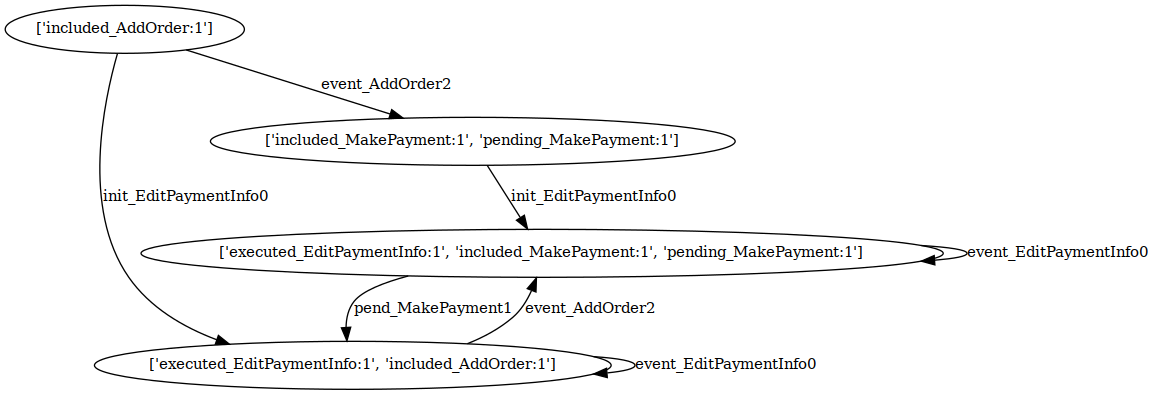

places: [ executed_EditPaymentInfo, included_AddOrder, pending_included_MakePayment ]
transitions: [ (event_AddOrder2, 'event_AddOrder2_label'), (event_EditPaymentInfo0, 'event_EditPaymentInfo0_label'), (init_EditPaymentInfo0, 'init_EditPaymentInfo0_label'), (pend_MakePayment1, 'pend_MakePayment1_label') ]
arcs: [ (event_AddOrder2, 'event_AddOrder2_label')->pending_included_MakePayment, (event_EditPaymentInfo0, 'event_EditPaymentInfo0_label')->executed_EditPaymentInfo, (init_EditPaymentInfo0, 'init_EditPaymentInfo0_label')->executed_EditPaymentInfo, (pend_MakePayment1, 'pend_MakePayment1_label')->executed_EditPaymentInfo, (pend_MakePayment1, 'pend_MakePayment1_label')->included_AddOrder, executed_EditPaymentInfo->(event_EditPaymentInfo0, 'event_EditPaymentInfo0_label'), executed_EditPaymentInfo->(init_EditPaymentInfo0, 'init_EditPaymentInfo0_label'), executed_EditPaymentInfo->(pend_MakePayment1, 'pend_MakePayment1_label'), included_AddOrder->(event_AddOrder2, 'event_AddOrder2_label'), 

In [3]:
from pm4py.objects.conversion.dcr.variants.to_inhibitor_net import Dcr2PetriNet
from pm4py.objects.dcr.importer import importer as dcr_importer

example = 'models/RunningExampleTAPNoriginal.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
# dcr_dict = nested_groups_and_sps_to_flat_dcr(dcr_dict)
# dcr_exporter.apply(dcr_dict, 'models/debug_exported.xml')
dcr_dict = dcr_dict.obj_to_template()
d2p = Dcr2PetriNet(debug=True,preoptimize=True, postoptimize=True)
net, marking = d2p.apply(dcr_dict)
net

In [ ]:
net2, m2, _ = murata.apply_reduction(net,m,set())
view_petri_net(net2,m2)

In [ ]:
print(f'P: {len(net.places)} T: {len(net.transitions)} A: {len(net.arcs)}')
print(f'P: {len(net2.places)} T: {len(net2.transitions)} A: {len(net2.arcs)}')

In [ ]:
pnml_exporter.apply(net2,m2,'models/murata_net_example.tapn',variant=pnml_exporter.TAPN)

In [ ]:
example = 'models/test4.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':False,'labels_as_ids':True})
# dcr_dict = nested_groups_and_sps_to_flat_dcr(dcr_dict)
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_INHIBITOR_NET, parameters={'preoptimize':True,
               'postoptimize':True,                                                                                  'map_unexecutable_events':False,
                'debug':True, 'tapn_path':'models/test4_untimed.tapn'})

In [ ]:
trans_sys = reachability_graph.construct_reachability_graph(tapn, m, use_trans_name=True,
parameters={'petri_semantics': tapn_semantics.TimedArcSemantics()})

In [ ]:
ts_visualizer.apply(trans_sys)

In [ ]:
example = 'models/test4.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':False,'labels_as_ids':True})
# nested_groups_and_sps_to_flat_dcr(rail_dcr_labeled)
# dcr_dict = rail_dcr_labeled.obj_to_template()
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True, 'postoptimize':True, 'map_unexecutable_events':False, 'debug':True,'tapn_path':'models/test4.tapn'})

In [ ]:
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr/')
print(os.getcwd())
from pm4py.objects.dcr.importer import importer as dcr_importer
from pm4py.objects.conversion.dcr import converter as dcr_to_tapn
example = 'models/rail_example.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':False,'labels_as_ids':True})
# nested_groups_and_sps_to_flat_dcr(rail_dcr_labeled)
# dcr_dict = rail_dcr_labeled.obj_to_template()
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True, 'postoptimize':True, 'map_unexecutable_events':False, 'debug':True,'tapn_path':'models/rail_example.tapn'})

In [ ]:
tapn = tapn_obj.TimedArcNet()
P0 = tapn.Place('P0',properties={properties.AGE_INVARIANT:10})
P1 = tapn.Place('P1')
T0 = tapn.Transition('T0')
tapn.places.add(P0)
tapn.places.add(P1)
tapn.transitions.add(T0)
a0 = pn_utils.add_arc_from_to_with_check(P0, T0, tapn, type=properties.TRANSPORT_ARC)
a1 = pn_utils.add_arc_from_to_with_check(T0, P1, tapn, type=properties.TRANSPORT_ARC)
a0.properties[properties.AGE_MIN] = 5
a0.properties[properties.TRANSPORT_INDEX] = 0
a1.properties[properties.TRANSPORT_INDEX] = 0
m = tapn_obj.TimedMarking()
m[P0] = 1
m.timed_dict[P0] = 0

In [ ]:
view_petri_net(tapn,m)

In [ ]:
m.timed_dict[P0] = 0

In [ ]:
m

In [ ]:
tapn_semantics.enabled_transitions(tapn,m)

In [ ]:
inhib_semantics.enabled_transitions(tapn,m)

In [ ]:
test_dcr = deepcopy(dcr_template)
test_dcr['events'] = {'A','B','C'}
test_dcr['includesTo'] = {'A':{'B'}}
test_dcr['conditionsFor'] = {'C': {'A'}}
test_dcr['responseTo'] = {'A':{'B'}}
test_dcr['excludeTo'] = {'A':{'A'},'B':{'B'}}
test_dcr['marking']['included'] = {'A','C'}

tapn, m = dcr_to_tapn.apply(test_dcr,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True,
               'postoptimize':True,                                                                                  'map_unexecutable_events':False,
                'debug':False,                                                                       'tapn_path':'models/test.tapn'})